# Assignment 2: Milestone I Natural Language Processing
## Task 2&3
#### Student Name: Momitha
#### Student ID: s3856512


Date: 3/11

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: please include all the libraries you used in your assignment, e.g.,:
* pandas
* re
* numpy

## Introduction
In this task, we generated 7 different types of feature representations for the collection of job advertisements. Only considering the description of the job advertisement. The feature representation that we generate include:
- `Bag-of-words` model
-` FastText` language model (Word2Vec pretrained model)
- `GloVe` (Word2Vec pretrained model)

For the above models we computed the weighted (i.e., TF-IDF weighted) and unweighted vector representation for each job advertisement description.

## Importing libraries 

In [1]:
# Code to import libraries as you need in this assessment, e.g.,
import nltk
import pandas as pd
import numpy as np
from sklearn.datasets import load_files  
from nltk.tokenize import sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.probability import *
from itertools import chain
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
import gensim.downloader as api
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import nltk.data
import re
import os

## Task 2. Generating Feature Representations for Job Advertisement Descriptions

### 2.1 The Dataset

In the previous task1, we have demonstrated the basic steps of text pre-processing with the description of the job advertisements. 
We have also saved all the tokenized description, the vocabulary and the generated data features in .txt files. 
In this task, we are going to bulid maching leaning models for document classification, using our generated data features. 

Same as in the previous activity, the document collection that we are going to use is the `job_ads.txt`. 
To be brief, the dataset:
- Category Labels: 8 (Accounting_Finance, Engineering, Healthcare_Nursing, Hospitality_Catering, IT, PR_Advertising_Marketing, Sales and Teaching.)

- `job_ads.txt` stores the pre-processed description,ID of the job ads and and the unprocessed titles, WebIndexed and categories.
- `Vocab.txt` stores the vocabulary (as well as the index of each word).

#### Importing data from task 1 using Regex
Iterating through the all the .txt files in all 8 folders and storing each field in a list.

In [2]:
# Code to perform the task...
# Reference: https://www.programcreek.com/python/example/96665/re.fullmatch

txt_file = 'job_ads.txt'

job_id=[]
job_category=[]
job_web_index=[]
job_title=[]
job_description=[]

with open(txt_file) as f: 
    fileread = f.read().splitlines() 
for i in fileread:
    if re.fullmatch(r'ID: (\d{5})',i):
        ID=re.fullmatch(r'ID: (\d{5})',i)
        job_id.append(ID.group(1))

    if re.fullmatch(r'Category: (.+)',i):
        Cat=re.fullmatch(r'Category: (.+)',i)
        job_category.append(Cat.group(1))

    if re.fullmatch(r'Webindex: (.+)',i):
        WI=re.fullmatch(r'Webindex: (.+)',i)
        job_web_index.append(WI.group(1))

    if re.fullmatch(r'Title: (.+)',i):
        T=re.fullmatch(r'Title: (.+)',i)
        job_title.append(T.group(1))

    if re.fullmatch(r'Description: (.+)',i):
        D=re.fullmatch(r'Description: (.+)',i)
        job_description.append(D.group(1))
        

In [3]:
# Converting the vocab file into a list from 
# task 1 and splitting by a colon to just the 
with open("vocab.txt", "r") as x:
    lines = x.readlines()
    vocab = []
    for l in lines:
        as_list = l.split(":")
        vocab.append(as_list[0])
    vocab[0]

In [4]:
#checking the length
len(vocab)

40038

In [5]:
#checking the length
len(job_description)

55447

In [6]:
#checking the datatype
type(vocab),type(job_description)

(list, list)

In [7]:
# test index to check if fields are right - used throughout the notebook
test_ind = 2

In [8]:
# checking ID, webIndex, category and title of a specific job ad
job_id[test_ind], job_web_index[test_ind],job_category[test_ind], job_title[test_ind], 


('50131',
 '69182387',
 'Hospitality_Catering',
 'chef de rang for michelin starred restaurant')

In [9]:
# checking descriptions of a specific job ad
job_description[test_ind]

'french restaurant club gascon michelin established heart london easy access bus train tube chef de rang waiter complete split straight shifts depending rota days week closed sunday bank holiday average week real career progression part small group quality restaurant london wages basic share gratuities staff discount restaurants check site clubgascon interested joining send detailed applied arrange meeting order discuss offer'

In [10]:
tk_description=[description.split(' ') for description in job_description]

### 2.2 Building Vector Representation
After text pre-processing has been completed for description in job_ad, each individual document needs to be transformed into a numeric representation.
In the set of job adverstisements and a given pre-defined list of words(vocab). We are computing a count vector representation for each description. 
* an integer count, each entry is `word:count`, telling how many times a word appear in a document.

### 2.2.1 Bag of words - Generating Count Vector 
We will demonstrate the usage of the following two classes:
CountVectorizer: It converts a collection of text documents to a matrix of token counts.

In [11]:
cVectorizer = CountVectorizer(analyzer = "word",vocabulary = vocab) # initialised the CountVectorizer

In [12]:
count_features = cVectorizer.fit_transform([description for description in job_description]) # generate the count vector representation for all descriptions
print(count_features.shape)

(55447, 40038)


In [13]:
job_description[2]

'french restaurant club gascon michelin established heart london easy access bus train tube chef de rang waiter complete split straight shifts depending rota days week closed sunday bank holiday average week real career progression part small group quality restaurant london wages basic share gratuities staff discount restaurants check site clubgascon interested joining send detailed applied arrange meeting order discuss offer'

In [14]:
# test_ind = 2

#### Check Count Vector Representation
We are printing out the words that appear in a description, by out running example `test_ind`. 

In [15]:
def validator(data_features, vocab, a_ind,job_description):
    print("Job Description:",job_description[a_ind])
    print("--------------------------------------------\n")
    print("Vector representation:\n") # printing the vector representation as format 'word:value' (
                                      # an integer for count vector; 
    for word, value in zip(vocab, data_features.toarray()[test_ind]): 
        if value > 0:
            print(word+":"+str(value), end =' ')

In the validator function above, we used a`zip` function that takes iterable items and merges them into a single tuple. The resultant value is a zip object that stores pairs of iterables.

The vocab directly corresponds to the data_features.The `toarray()` method converts the efficient representation of a sparse matrix that sklearn uses to an ordinary readable dense ndarray representation.


In [16]:
validator(count_features,vocab,test_ind,job_description)

Job Description: french restaurant club gascon michelin established heart london easy access bus train tube chef de rang waiter complete split straight shifts depending rota days week closed sunday bank holiday average week real career progression part small group quality restaurant london wages basic share gratuities staff discount restaurants check site clubgascon interested joining send detailed applied arrange meeting order discuss offer
--------------------------------------------

Vector representation:

access:1 applied:1 arrange:1 average:1 bank:1 basic:1 bus:1 career:1 check:1 chef:1 closed:1 club:1 clubgascon:1 complete:1 days:1 de:1 depending:1 detailed:1 discount:1 discuss:1 easy:1 established:1 french:1 gascon:1 gratuities:1 group:1 heart:1 holiday:1 interested:1 joining:1 london:2 meeting:1 michelin:1 offer:1 order:1 part:1 progression:1 quality:1 rang:1 real:1 restaurant:2 restaurants:1 rota:1 send:1 share:1 shifts:1 site:1 small:1 split:1 staff:1 straight:1 sunday:1 tra

In [17]:
FreqDist(tk_description[test_ind])

FreqDist({'restaurant': 2, 'london': 2, 'week': 2, 'french': 1, 'club': 1, 'gascon': 1, 'michelin': 1, 'established': 1, 'heart': 1, 'easy': 1, ...})

Also manually checked some of the frequencies values and compare with the original .txt file to see whether I've done that properly.

### 2.2.2 Saving Output Count Vector

This file stores the sparse count vector representation of job advertisement descriptions in the following format. Each line starts with a ‘#’ key followed by the webindex of the job advertisement, and a comma ‘,’. The rest of the line is the sparse representation of the corresponding description in the form of `word_integer_index:word_freq` separated by comma.

In [18]:
filename = "count_vectors.txt" # File name
job_total = count_features.shape[0] # Number of job descriptions
out_file = open(filename, 'w') 
for i in range(0, job_total): # loop through every job ad
    out_file.write('#'+str(job_web_index[i]).strip('\n'))
    for vocab_ind in count_features[i].nonzero()[1]: # for each word index that has non-zero entry in the count_features
        value = count_features[i][0,vocab_ind] 
        out_file.write(",{}:{}".format(vocab_ind,value)) 
    out_file.write('\n') # start a new line after each description
out_file.close() 


### 2.3 Converting into a dataframe

In [19]:
# converting into a pd dataframe for see TDIDF weighted and 
# unweighted score of each model.
df=pd.DataFrame()
df['jobId']=job_id
df['jobWebindex']=job_web_index
df['jobCategory']=job_category
df['jobTitle']=job_title
df['jobDescription']=job_description
df['tkdescription']=tk_description
df.head()

,jobId,jobWebindex,jobCategory,jobTitle,jobDescription,tkdescription
0,14624,62119057,Engineering,plant engineer,established manufacturer supplier quality wate...,"[established, manufacturer, supplier, quality,..."
1,31567,66314490,Healthcare_Nursing,residential care worker,timeout children homes rapidly expanding foref...,"[timeout, children, homes, rapidly, expanding,..."
2,50131,69182387,Hospitality_Catering,chef de rang for michelin starred restaurant,french restaurant club gascon michelin establi...,"[french, restaurant, club, gascon, michelin, e..."
3,31419,64752715,Healthcare_Nursing,inpatient ward team leader,inpatient ward leader description patient lead...,"[inpatient, ward, leader, description, patient..."
4,47238,71792012,Teaching,information services support analyst,information details relating selected review i...,"[information, details, relating, selected, rev..."


In [20]:
df.shape #no. of rows & columns

(55447, 6)

The `gen_vocIndex` function reads the the vocabulary file, and create an `w_index:word` dictionary for us to create `job_tVectors.txt`

In [21]:
def gen_vocIndex(voc):
    return {int(i):voc[i] for i in range(0,len(voc))}

In [22]:
vocab_dict = gen_vocIndex(vocab)
vocab_dict

{0: "a'level",
 1: 'aa',
 2: 'aaa',
 3: 'aaappointments',
 4: 'aab',
 5: 'aac',
 6: 'aacc',
 7: 'aae',
 8: 'aah',
 9: 'aak',
 10: 'aamm',
 11: 'aan',
 12: 'aand',
 13: 'aantrekkelijk',
 14: 'aap',
 15: 'aar',
 16: 'aarca',
 17: 'aardman',
 18: 'aareon',
 19: 'aaron',
 20: 'aaronwallis',
 21: 'aarosette',
 22: 'aarosettehotel',
 23: 'aarosettelivein',
 24: 'aarosetterestaurant',
 25: 'aarosetterestaurantlondon',
 26: 'aarosettes',
 27: 'aarosettesinternationalchainofhotels',
 28: 'aarosetteslivein',
 29: 'aasl',
 30: 'aasp',
 31: 'aastra',
 32: 'aat',
 33: 'aatom',
 34: 'ab',
 35: 'aba',
 36: 'abacus',
 37: 'abaility',
 38: 'abandoned',
 39: 'abandonment',
 40: 'abandons',
 41: 'abap',
 42: 'abaqus',
 43: 'abatement',
 44: 'abb',
 45: 'abbas',
 46: 'abbey',
 47: 'abbeywood',
 48: 'abbie',
 49: 'abbot',
 50: 'abbots',
 51: 'abbott',
 52: 'abby',
 53: 'abbyy',
 54: 'abc',
 55: 'abd',
 56: 'abdo',
 57: 'abdominal',
 58: 'abdul',
 59: 'abdulla',
 60: 'abel',
 61: 'abellprotocoleducation',
 

### 2.4 Generating TF-IDF Vectors

We will generate the TF-IDF Vector to represent each of the document.

Similar to the use of `CountVector`, we first initialise a `TfidfVectorizer` object by only specifying the value of "analyzer" and the vocabulary, and then convert the job descriptions into a list of strings, each of which corresponds
to a job description.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tVectorizer = TfidfVectorizer(analyzer = "word",vocabulary = vocab) # initialised the TfidfVectorizer
tfidf_features = tVectorizer.fit_transform([' '.join(description) for description in tk_description]) # generate the tfidf vector representation for all descriptions
tfidf_features.shape

(55447, 40038)

In [24]:
validator(tfidf_features,vocab,test_ind,job_description)

Job Description: french restaurant club gascon michelin established heart london easy access bus train tube chef de rang waiter complete split straight shifts depending rota days week closed sunday bank holiday average week real career progression part small group quality restaurant london wages basic share gratuities staff discount restaurants check site clubgascon interested joining send detailed applied arrange meeting order discuss offer
--------------------------------------------

Vector representation:

access:0.09574677354923596 applied:0.1417183378375918 arrange:0.13628241851927125 average:0.13240114919119078 bank:0.09996712847181426 basic:0.07934860996001573 bus:0.1552182042282834 career:0.06046212691043971 check:0.10574706588556661 chef:0.103121597093235 closed:0.17561634384633967 club:0.14784643407430864 clubgascon:0.2685366526243744 complete:0.09568438301320589 days:0.07215138198017955 de:0.12208140078202691 depending:0.09945409344781775 detailed:0.1051924153287498 discoun

Printing out the weighted vector for the example document.

### 2.4.1 Saving the Vector Representation

Here, we are saving the `tdidf` vector representation. As there are only a limited number of words appear in a document, we are retrieving the index of the non-zero entry of the data features by calling the `nonzero()` function. 
This function checks and return the indices of the elements that are non-zero. These indices are returned as a tuple of arrays, one for each dimension of the matrix, containing the indices of the non-zero elements in that dimension.

The `job_tVector.txt` is saving the word index of each word that appears in the description in the form of `word_integer_index:word_weight `separated by colon.

In [25]:
filename = "job_tVector.txt"
num = tfidf_features.shape[0] # the number of document
out_file = open(filename, 'w') # careates a txt file and open to save the vector representation
for a_ind in range(0, num): # loops through each descriptiona by index
    for f_ind in tfidf_features[a_ind].nonzero()[1]: # for each word index that has non-zero entry in the data_feature
        value = tfidf_features[a_ind][0,f_ind] # retrieve the value of the entry from data_features
        out_file.write("{}:{} ".format(f_ind,value)) # write the entry to the file in the format of word_index:value
    out_file.write('\n') # start a new line after each description
out_file.close() # close the file

The doc_wordweights function takes the tfidf document vector file, as well as the `w_index:word` vocab dictionary, creates the mapping between `w_index` and the actual word, and creates a dictionary of `word:weight` or each unique word appear in the document.

In [26]:
def doc_wordweights(fName_tVectors, vocab_dict):
    tfidf_weights = [] # a list to store the  word:weight dictionaries of documents

    with open(fName_tVectors) as tVecf: 
        tVectors = tVecf.read().splitlines() # each line is a tfidf vector representation of a document in string format 'word_index:weight word_index:weight .......'
    for tv in tVectors: # for each tfidf document vector
        tv = tv.strip()
        weights = tv.split(' ') # list of 'word_index:weight' entries
        weights = [w.split(':') for w in weights] # change the format of weight to a list of '[word_index,weight]' entries
        wordweight = {vocab_dict[int(w[0])]:w[1] for w in weights} # construct the weight dictionary, where each entry is 'word:weight'
        tfidf_weights.append(wordweight) 
    return tfidf_weights

fName_tVectors = 'job_tVector.txt' #give t vector....
tfidf_weights = doc_wordweights(fName_tVectors, vocab_dict)


In [27]:
# taking a look at the tfidf word weights dictionary of the first document
tfidf_weights[0]

{'years': '0.041591543606328135',
 'workload': '0.07732149097070679',
 'water': '0.528671672086231',
 'uv': '0.14982019483191586',
 'treatment': '0.16407428109220865',
 'tailoring': '0.12993683084432922',
 'systems': '0.08742717233594731',
 'supplier': '0.07260189264633089',
 'solutions': '0.04618749218937137',
 'softeners': '0.3220113158752686',
 'servicing': '0.08680672908274054',
 'seeking': '0.05028642496979361',
 'sampling': '0.12071521699667226',
 'routine': '0.09325719575971565',
 'reverse': '0.2674134465197176',
 'return': '0.0587102766103632',
 'results': '0.06350536527776468',
 'responsibilities': '0.04423297453503537',
 'requirements': '0.04039152100387729',
 'relevant': '0.04718642721144391',
 'recruit': '0.05243262529813085',
 'ranging': '0.08653047904724323',
 'quality': '0.041684822549014955',
 'product': '0.0513212960650128',
 'practice': '0.05798976344742965',
 'plants': '0.11640853484499959',
 'planet': '0.13457921748000237',
 'package': '0.0480818599033286',
 'osmosi

### 2.5 FastText Model

Using the fastText library for training word-embedding models, and performing similarity operations & vector lookups analogous to Word2Vec. 

In the following block of code, we import the `FastText` model form Gensim library, then:
1. We set the path to the corpus file. Similar as above, we use the `descriptions.txt` as the training corpus;
2. Initialise the `FastText` model, similar as before, we use 200 dimention vectors;
3. Then we build the vocabulary from the copurs;
4. Finally, we train the fasttext model based on the corpus.

In [28]:
import gensim.downloader as api

In [29]:
out_file = open("descriptions.txt", 'w') # creates a txt file named 'descriptions.txt', open in write mode
for desc in tk_description:
    out_file.write(' '.join(desc) + '\n') # join the tokens in a description with space, and write the obtained string to the txt document
out_file.close() # close the file

In [30]:
from gensim.models.fasttext import FastText

#corpus file name
corpus_file = 'descriptions.txt'

# Initialising FastText model with vectorsize of 200
descFT = FastText(vector_size=200) 

# providing the corpus
descFT.build_vocab(corpus_file=corpus_file)

# training the model
descFT.train(
    corpus_file=corpus_file, epochs=descFT.epochs,
    total_examples=descFT.corpus_count, total_words=descFT.corpus_total_words,
)

print(descFT)

FastText(vocab=22816, vector_size=200, alpha=0.025)


In [31]:
descriptionFT = descFT
print(descriptionFT)
descriptionFT_wv= descriptionFT.wv

FastText(vocab=22816, vector_size=200, alpha=0.025)


The `gen_docVecs` function was taken from actvity 6.
This function has been modified for better performance and faster runtime. It takes the word embeddings dictionary, the tokenized text of descriptions, and the tfidf weights (list of word:weight dictionaries, one for each description) as arguments, and generates the document embeddings:
 1. creates an empty list `docs_vectors` to store the document embeddings of descriptions
 2. it loops through every tokenized description:
    - creates an empty list `temp` to store the word vectors and word weights in every description
    - for each word that exists in the word embeddings dictionary/keyedvectors, 
        - if the argument `tfidf` weights are empty `[]`, it sets the weight of the word as 1
        - otherwise, retrieve the weight of the word from the corresponding word:weight dictionary of the description from  `tfidf`
    - row bind the weighted word embedding to `temp`
    - takes the sum of each column to create the document vector, i.e., the embedding of a description
    - append the created document vector to the list of document vectors
    - convert the `doc_vectors` back to a pd dataframe to see the model scores.


In [32]:
def gen_docVecs(wv,tk_txts,tfidf = []): 
    # Generating Vector Representation
    # if tfidf parameter is empty==> unweighted
    # if tfidf paramter is not empty=>weighted

    docs_vectors = [] #Initialising Empty dataframe
    for i in range(0,len(tk_txts)):
        tokens = list(set(tk_txts[i])) # Distinct words in the document

        temp = []  #empty list to store and sum the word embeddings of a document
        for w_ind in range(0, len(tokens)): # Iterating over distinct words in a document
            try:
                word = tokens[w_ind]
                word_vec = wv[word] # if word is present in pretrained model's dimension we execute further else 
                                    #exception occurs and iteration skips

                if tfidf != []: # if tfidf parameter is non empty it is for weighted and we assign the weights
                    word_weight = float(tfidf[i][word])
                else:
                    word_weight = 1 # if the parameter is empty it is unweighted and we assign weight=1
                temp.append(word_vec*word_weight) #if word is present multiply the weights and append in the dataframe
            except:
                pass
        doc_vector = np.sum(temp,axis=0) # When the iteration is over for a whole document 
                                        #we add all the word embedding for the document and store it.
        docs_vectors.extend([doc_vector])
    docs_vectors=pd.DataFrame(docs_vectors) # output as a dataframe
    return docs_vectors

### 2.5.1 Unweighted and Weighted FastText

In [33]:
#Unweighted
descriptionFT_dvs = gen_docVecs(descriptionFT_wv,df['tkdescription'])

In [34]:
descriptionFT_dvs.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,45.025406,-17.058867,24.403540,3.071211,0.888315,2.509837,-7.218607,22.508402,3.979021,45.662762,...,34.068081,-21.542820,-37.116177,13.237388,8.856873,54.509483,-55.919128,4.715892,-17.198013,-26.275095
1,0.410525,22.168835,8.781134,-3.956362,5.714267,22.723959,19.988506,8.313676,-31.897266,7.266672,...,10.349417,13.080052,-30.905033,-11.949417,-8.973454,30.578278,32.858143,-1.643187,-8.640537,-21.787397
2,6.696336,-15.103410,11.227717,11.739390,-4.882558,5.031960,6.795989,-2.496521,-5.076725,26.236223,...,-44.408550,17.234634,-16.504894,-9.065966,5.434242,2.055464,17.595541,17.602358,-20.166735,24.311533
3,17.898008,-15.151012,-32.802746,-3.273103,0.878679,-8.209851,24.607817,25.388596,-55.734661,-10.291518,...,-1.374869,20.369444,-33.226768,-9.559024,-10.995298,6.793263,22.102520,-15.042557,-21.821289,-7.434136
4,36.504349,-19.410488,-1.157766,-4.637191,-12.195868,23.962624,8.347702,2.780844,-6.405174,20.257729,...,-9.023241,-8.510340,-23.464571,-8.060084,6.938059,-11.290730,12.682350,-9.719682,-26.806499,-8.231082


In [35]:
#weighted
Weighted_descriptionFT_dvs = gen_docVecs(descriptionFT_wv,df['tkdescription'],tfidf_weights)

In [36]:
Weighted_descriptionFT_dvs.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,3.469238,-0.240637,5.229765,0.046626,0.772127,-0.193331,-1.174221,0.863929,1.051283,3.448365,...,3.484170,-2.174972,-1.923636,0.723558,1.734697,5.107713,-5.697339,-0.699853,-0.424982,-0.736042
1,-1.761691,3.369421,1.831858,-0.123276,2.018784,3.201373,2.126018,0.417874,-4.772162,0.194428,...,0.314141,1.752271,-4.176344,-1.235662,-0.796336,3.092054,4.072305,-0.256191,-1.304480,-2.770591
2,-0.167379,-2.183992,1.779593,1.527498,-0.249718,0.841425,1.002063,-1.687635,0.602993,2.986242,...,-5.429161,3.075022,-1.595211,-0.609139,0.803708,-0.274488,1.985679,1.136691,-2.149851,2.604549
3,1.074362,-1.392100,-4.055393,-1.755200,1.652328,-0.487043,2.718004,1.671032,-5.318738,-1.010230,...,0.322174,1.399777,-3.287424,-1.998191,-1.038425,0.804375,2.086569,-2.599354,-2.111186,-0.043358
4,4.196410,-2.768167,0.274083,-0.957185,-1.283426,2.948493,1.426176,-0.350606,-1.241626,1.368446,...,-0.602215,-1.489869,-2.629582,-1.575864,1.397821,-0.920711,1.158219,-1.966930,-2.205978,-1.348098


### 2.5.2 FastText - Check weighted and unweighted 

In [37]:
descriptionFT_dvs.isna().any().sum() 

0

In [38]:
descriptionFT_dvs.shape

(55447, 200)

In [39]:
Weighted_descriptionFT_dvs.isna().any().sum() # check whether there is 

0

In [40]:
Weighted_descriptionFT_dvs.shape

(55447, 200)

In [41]:
FT = gen_docVecs(descriptionFT_wv,df['tkdescription'][0:100])

### 2.5.3 FastText Visualisations

The following function `plotTSNE` is used to plot Fast Text, GloVe and Googlenews visulisations.
It takes the following arugments:

- labels, the lable/category of each job advertisement.
- features, a numpy array of document embeddings, each for a job ad.
and projects the feature/document embedding vectors in a 2 dimension space and plot them out. It does the following:

1. get the set of classes, called categories (8 categories)
2. sample 5% of the data/document embeddings randomly, and record the indices selected
3. project the selected document embeddings in 2 dimensional space using tSNE, each document embedding now corresponds to a 2 dimensional vector in projected_features
4. plot them out as scatter plot and highlight different categories in different color

In [42]:

def plotTSNE(labels,features): # features as a numpy array, each element of the array is the document embedding of a description
    job_categories = sorted(labels.unique())
    # Sampling a subset of our dataset because t-SNE is computationally expensive
    SAMPLE_SIZE = int(len(features) * 0.05)
    np.random.seed(0)
    indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
    projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])
    colors = ['pink', 'orange', 'midnightblue', 'darkgrey', 'green','black','blue','yellow']
    for i in range(0,len(job_categories)):
        points = projected_features[(labels[indices] == job_categories[i])]
        plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[i], label=job_categories[i])
    plt.title("Feature vector for each category, projected on 2 dimensions.",
              fontdict=dict(fontsize=15))
    plt.legend()
    plt.show()
    

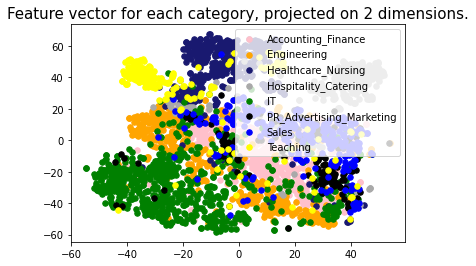

In [43]:
#UnWeighted
features = descriptionFT_dvs.to_numpy()
plotTSNE(df['jobCategory'],features)

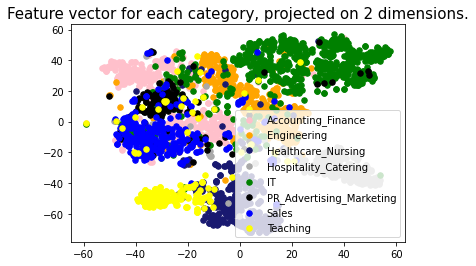

In [44]:
#Weighted
features = Weighted_descriptionFT_dvs.to_numpy()
plotTSNE(df['jobCategory'],features)

## 2.6 GloVe

In [45]:
# from utils import loadGloVe

fPath = "glove/glove.6B.200d.txt"
# preTGloVe_wv = loadGloVe(fPath)

new = {} # initialise an empty dictionary
with open(fPath, encoding="utf-8") as f: # open the txt file containing the word embedding vectors
    for line in f:
        word, coefs = line.split(maxsplit=1) # The maxsplit defines the maximum number of splits. 
                                             # in the above example, it will give:
                                             # ['population','0.035182 1.4248 0.9758 0.1313 -0.66877 0.8539 -0.11525 ......']
        coefs = np.fromstring(coefs, "f", sep=" ") # construct an numpy array from the string 'coefs', 
                                                   # e.g., '0.035182 1.4248 0.9758 0.1313 -0.66877 0.8539 -0.11525 ......'
        new[word] = coefs # create the word and embedding vector mapping

print("Found %s word vectors." % len(new))



Found 400001 word vectors.


### 2.6.1 GloVe Unweighted and Weighted 

In [46]:
# Unweighted
GloVe_desc_dvs = gen_docVecs(descriptionFT_wv,df['tkdescription']) # generate document embeddings

In [47]:
GloVe_desc_dvs.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,45.025406,-17.058867,24.403540,3.071211,0.888315,2.509837,-7.218607,22.508402,3.979021,45.662762,...,34.068081,-21.542820,-37.116177,13.237388,8.856873,54.509483,-55.919128,4.715892,-17.198013,-26.275095
1,0.410525,22.168835,8.781134,-3.956362,5.714267,22.723959,19.988506,8.313676,-31.897266,7.266672,...,10.349417,13.080052,-30.905033,-11.949417,-8.973454,30.578278,32.858143,-1.643187,-8.640537,-21.787397
2,6.696336,-15.103410,11.227717,11.739390,-4.882558,5.031960,6.795989,-2.496521,-5.076725,26.236223,...,-44.408550,17.234634,-16.504894,-9.065966,5.434242,2.055464,17.595541,17.602358,-20.166735,24.311533
3,17.898008,-15.151012,-32.802746,-3.273103,0.878679,-8.209851,24.607817,25.388596,-55.734661,-10.291518,...,-1.374869,20.369444,-33.226768,-9.559024,-10.995298,6.793263,22.102520,-15.042557,-21.821289,-7.434136
4,36.504349,-19.410488,-1.157766,-4.637191,-12.195868,23.962624,8.347702,2.780844,-6.405174,20.257729,...,-9.023241,-8.510340,-23.464571,-8.060084,6.938059,-11.290730,12.682350,-9.719682,-26.806499,-8.231082


In [48]:
# weighted
Weighted_GloVe_desc_dvs = gen_docVecs(descriptionFT_wv,df['tkdescription'],tfidf_weights)

In [49]:
Weighted_GloVe_desc_dvs.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,3.469238,-0.240637,5.229765,0.046626,0.772127,-0.193331,-1.174221,0.863929,1.051283,3.448365,...,3.484170,-2.174972,-1.923636,0.723558,1.734697,5.107713,-5.697339,-0.699853,-0.424982,-0.736042
1,-1.761691,3.369421,1.831858,-0.123276,2.018784,3.201373,2.126018,0.417874,-4.772162,0.194428,...,0.314141,1.752271,-4.176344,-1.235662,-0.796336,3.092054,4.072305,-0.256191,-1.304480,-2.770591
2,-0.167379,-2.183992,1.779593,1.527498,-0.249718,0.841425,1.002063,-1.687635,0.602993,2.986242,...,-5.429161,3.075022,-1.595211,-0.609139,0.803708,-0.274488,1.985679,1.136691,-2.149851,2.604549
3,1.074362,-1.392100,-4.055393,-1.755200,1.652328,-0.487043,2.718004,1.671032,-5.318738,-1.010230,...,0.322174,1.399777,-3.287424,-1.998191,-1.038425,0.804375,2.086569,-2.599354,-2.111186,-0.043358
4,4.196410,-2.768167,0.274083,-0.957185,-1.283426,2.948493,1.426176,-0.350606,-1.241626,1.368446,...,-0.602215,-1.489869,-2.629582,-1.575864,1.397821,-0.920711,1.158219,-1.966930,-2.205978,-1.348098


### 2.6.2 GloVe Check Unweighted and Weighted 

In [50]:
GloVe_desc_dvs.isna().any().sum() # check whether there are any null values

0

In [51]:
GloVe_desc_dvs.shape

(55447, 200)

In [52]:
Weighted_GloVe_desc_dvs.isna().any().sum() # check whether there are any null values

0

In [53]:
Weighted_GloVe_desc_dvs.shape

(55447, 200)

### 2.6.3 GloVe Visualisations

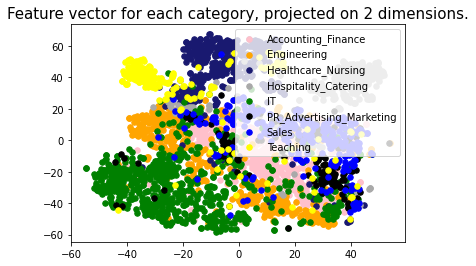

In [54]:
#Weighted
features = GloVe_desc_dvs.to_numpy()
plotTSNE(df['jobCategory'],features)

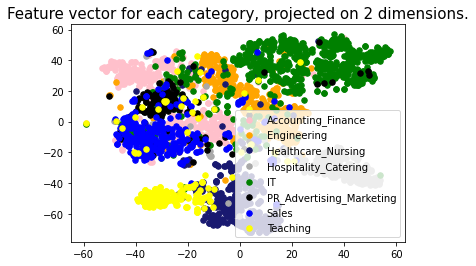

In [55]:
#Weighted
features = Weighted_GloVe_desc_dvs.to_numpy()
plotTSNE(df['jobCategory'],features)

## 2.7 Google News

In [56]:
import gensim.downloader as api
GoogleNews_wv = api.load('word2vec-google-news-300')

In [57]:
print(GoogleNews_wv)

In [58]:
GoogleNews_wv.vector_size

300

### 2.7.1 Google Unweighted and Weighted

In [59]:
desc_google_dvs = gen_docVecs(GoogleNews_wv,df['tkdescription'])

In [60]:
desc_google_dvs.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-3.688553,3.582012,1.283558,3.385788,-4.221454,0.864744,1.894760,-4.117126,2.682312,2.405952,...,-5.133179,3.091370,-4.215942,3.888016,0.949310,0.835854,1.404205,-0.346222,2.691978,-3.785381
1,-1.586456,0.255869,-0.884460,4.083801,-2.723434,-0.059269,2.531509,-2.133438,4.198395,-3.777405,...,-3.777039,1.830048,-5.748371,0.825230,-0.577484,1.132019,0.520099,-2.104340,0.702919,-0.675659
2,-2.846420,1.354240,-0.763062,4.373871,-1.648823,1.593285,0.112411,-5.134460,3.289598,1.921902,...,-2.046455,2.375320,-3.476669,2.082092,0.765060,-1.183014,0.099976,-1.420746,0.409443,-2.343201
3,-2.635483,1.141026,0.233490,-0.046021,-1.971451,0.097214,2.019745,-4.772556,4.632248,-2.953369,...,-2.564636,1.540573,-3.080627,2.777988,-1.341522,1.276276,0.118958,-0.497482,2.070480,0.155457
4,-1.975342,0.600061,-0.274567,1.411011,-1.719360,-1.640991,2.020630,-4.409790,3.294495,0.405975,...,-2.713169,2.469360,-3.062779,0.100613,1.989014,-0.843521,0.602633,-2.971413,-1.165161,-1.139404


In [61]:
Weighted_desc_google_dvs = gen_docVecs(GoogleNews_wv,df['tkdescription'],tfidf_weights)


In [62]:
Weighted_desc_google_dvs.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.302031,0.526959,0.315193,0.250016,-0.560327,0.195895,0.004302,-0.502256,0.169862,0.233332,...,-0.378328,0.255053,-0.346350,0.316490,-0.032877,-0.007113,-0.156080,0.028220,0.504951,-0.128035
1,-0.003255,-0.003555,0.073575,0.527871,-0.303898,-0.131593,0.384702,-0.516140,0.558473,-0.645094,...,-0.405287,0.132182,-0.712605,-0.052189,0.063277,0.097997,0.009760,-0.183313,0.006333,-0.071551
2,-0.335080,0.076048,-0.053174,0.516771,-0.164521,0.147431,-0.091770,-0.615414,0.428480,0.280967,...,-0.171250,0.295379,-0.380008,0.303031,0.146105,-0.115367,-0.007464,-0.261947,0.068285,-0.239664
3,-0.439929,0.252413,0.057093,0.011736,-0.217958,0.065631,0.042824,-0.401024,0.444184,-0.382660,...,-0.329724,0.103664,-0.405575,0.398219,-0.134234,0.132576,-0.165667,-0.020988,0.294106,0.225048
4,-0.250599,0.103530,0.084551,0.442687,-0.193634,-0.244946,0.362249,-0.639099,0.367651,-0.032228,...,-0.376406,0.299882,-0.543404,0.099113,0.421156,-0.084771,0.170544,-0.478934,0.082150,0.015700


### 2.7.2 Google Check weighted and unweighted

In [63]:
desc_google_dvs.shape

(55447, 300)

In [64]:
desc_google_dvs.isna().any().sum()

0

In [65]:
Weighted_desc_google_dvs.isna().any().sum()

0

In [66]:
Weighted_desc_google_dvs.shape

(55447, 300)

### 2.7.3 Google Visualisations

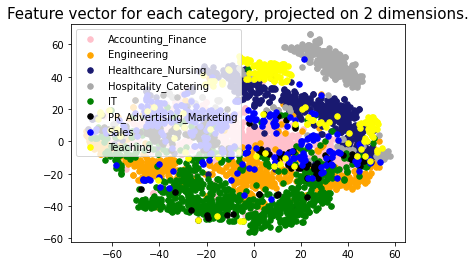

In [67]:
#UnWeighted
features = desc_google_dvs.to_numpy()
plotTSNE(df['jobCategory'],features)

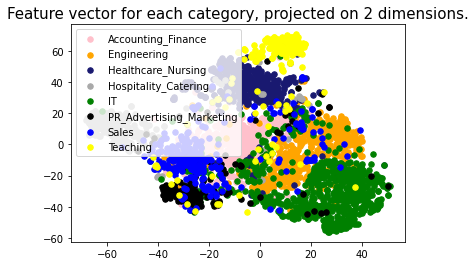

In [68]:
#Weighted
features = Weighted_desc_google_dvs.to_numpy()
plotTSNE(df['jobCategory'],features)

## Task 3. Job Advertisement Classification

### 3.1  - Q1 Language model comparisons

In [69]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegression
# Count_features - creating training and test split
X = count_features
y = df['jobCategory'].tolist()

model = LogisticRegression()
predicted = cross_validate(model, X, y, cv=5)
count = predicted['test_score'].mean()

# FastText(Weighted) - creating training and test split
X = Weighted_descriptionFT_dvs
y = df['jobCategory'].tolist()

model = LogisticRegression()
predicted = cross_validate(model, X, y, cv=5)
fastWeighted = predicted['test_score'].mean()

# FastText(Unweighted) - creating training and test split
X = descriptionFT_dvs
y = df['jobCategory'].tolist()

model = LogisticRegression()
predicted = cross_validate(model, X, y, cv=5)
fastUnweighted = predicted['test_score'].mean()


# GloVe(Weighted)- creating training and test split
X = Weighted_GloVe_desc_dvs
y = df['jobCategory'].tolist()

model = LogisticRegression()
predicted = cross_validate(model, X, y, cv=5)
gloveWeighted = predicted['test_score'].mean()

# GloVe(Unweighted) - creating training and test split
X = GloVe_desc_dvs
y = df['jobCategory'].tolist()

model = LogisticRegression()
predicted = cross_validate(model, X, y, cv=5)
gloveUnweighted = predicted['test_score'].mean()


# GoogleNews(Weighted) - creating training and test split
X = Weighted_desc_google_dvs
y = df['jobCategory'].tolist()

model = LogisticRegression()
predicted = cross_validate(model, X, y, cv=5)
googleWeighted = predicted['test_score'].mean()

# GoogleNews(Unweighted) - creating training and test split
X = desc_google_dvs
y = df['jobCategory'].tolist()

model = LogisticRegression()
predicted = cross_validate(model, X, y, cv=5)
googleUnweighted = predicted['test_score'].mean()

/Users/Momitha_1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Momitha_1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

/Users/Momitha_1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Momitha_1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

/Users/Momitha_1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Momitha_1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [70]:
dataf = [['Count_features', count], ['FastText (Weighted)', fastWeighted], ['FastText (Unweighted)', fastUnweighted],
        ['GloVe (Weighted)', gloveWeighted],['GloVe (Unweighted)', gloveUnweighted],['GoogleNews (Weighted)', googleWeighted],
        ['GoogleNews (Unweighted)', googleUnweighted]]
 
# Create the pandas DataFrame
dataf = pd.DataFrame(dataf, columns = ['Model', 'Predicted Model Score'])
 
# print dataframe.
dataf

,Model,Predicted Model Score
0,Count_features,0.873284
1,FastText (Weighted),0.874457
2,FastText (Unweighted),0.866305
3,GloVe (Weighted),0.874457
4,GloVe (Unweighted),0.866305
5,GoogleNews (Weighted),0.865223
6,GoogleNews (Unweighted),0.856530


After computing 5-cross validation, The best performing model is `FastText(Weighted)` and `GloVe(Weighted` with a score of `0.874457` and the second best performing is count_features with a score of `0.873284`.


### 3.2 - Question 2: Does more information provide higher accuracy?

Performing the pre-processing of titles in the job advertisements.

In [71]:
def tokenizeTitle(j_title):
   
    title = j_title.lower()  # convert all titles to lowercase
    # segmenting into sentences
    sentences = sent_tokenize(title)
    
    # tokenizing each sentence
    pattern=r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?"
    tokenizer = RegexpTokenizer(pattern) 
    token_lists = [tokenizer.tokenize(sen) for sen in sentences]
    
    # merging them into a list of tokens
    tokenised_title = list(chain.from_iterable(token_lists))
    return tokenised_title

In [72]:
def stats_print(tkn_titles):
    words = list(chain.from_iterable(tkn_titles)) # we put all the tokens in the corpus in a single list
    vocab = set(words) # compute the vocabulary by converting the list of words/tokens to a set, i.e., giving a set of unique words
    lexical_diversity = len(vocab)/len(words)
    print("Vocabulary size: ",len(vocab))
    print("Total number of tokens: ", len(words))
    print("Lexical diversity: ", lexical_diversity)
    print("Total number of titles:", len(tkn_titles))
    lens = [len(jtitle) for jtitle in tkn_titles]
    print("Average title length:", np.mean(lens))
    print("Maximun title length:", np.max(lens))
    print("Minimun title length:", np.min(lens))
    print("Standard deviation of title length:", np.std(lens))

In [73]:
tkn_titles = [tokenizeTitle(w) for w in df['jobTitle']] 

In [74]:
stats_print(tkn_titles)

Vocabulary size:  10854
Total number of tokens:  276941
Lexical diversity:  0.039192463376675896
Total number of titles: 55447
Average title length: 4.994697639186971
Maximun title length: 22
Minimun title length: 0
Standard deviation of title length: 2.0417594714915404


### Task 3.2 Removing Single Character Token

Removing any tokens that contain single characters (a token that of less than length 2) in job titles. 
Double checking whether it has been done properly.

In [75]:
doubleChar_list = [[w for w in title if len(w) < 2] \
                      for title in tkn_titles] # create a list of single character token for each review
list(chain.from_iterable(doubleChar_list))

['k',
 'k',
 'c',
 'k',
 'c',
 'c',
 'k',
 'c',
 'k',
 'c',
 'k',
 'k',
 'k',
 'k',
 'm',
 'e',
 's',
 'c',
 'c',
 'c',
 'c',
 'k',
 't',
 'c',
 'k',
 'c',
 'c',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'b',
 'b',
 'v',
 'k',
 'k',
 'c',
 'k',
 'k',
 'a',
 'p',
 'c',
 'c',
 'k',
 'k',
 'x',
 'k',
 'k',
 'h',
 'c',
 'x',
 'k',
 'k',
 'k',
 'a',
 'e',
 'k',
 'a',
 'c',
 'k',
 'b',
 'b',
 'j',
 'c',
 'c',
 'c',
 'c',
 'k',
 'c',
 'k',
 'x',
 'x',
 'j',
 'k',
 'k',
 'k',
 'k',
 'c',
 'c',
 'k',
 'k',
 'z',
 'k',
 'p',
 'a',
 'k',
 'c',
 'k',
 'k',
 's',
 'x',
 'c',
 'a',
 'x',
 'c',
 'c',
 'k',
 'r',
 'k',
 'k',
 'a',
 'k',
 'p',
 'h',
 'c',
 'k',
 'a',
 'e',
 'k',
 'b',
 'b',
 'k',
 'k',
 'c',
 'c',
 'c',
 'b',
 'q',
 'k',
 'k',
 'k',
 'a',
 'b',
 'b',
 't',
 'x',
 'c',
 'k',
 'p',
 'a',
 'k',
 'x',
 'k',
 'k',
 'c',
 'k',
 'e',
 'a',
 'w',
 'k',
 'c',
 'c',
 'k',
 'c',
 'a',
 'w',
 'k',
 'x',
 'k',
 'e',
 'x',
 'c',
 'm',
 'k',
 'k',
 'c',
 'k',
 'l',
 'k',
 'k',
 'k',
 'a',
 'k',
 'c',
 'c'

In [76]:
tkn_titles[2]

['chef', 'de', 'rang', 'for', 'michelin', 'starred', 'restaurant']

In [77]:
tkn_titles = [[w for w in title if len(w) >=2] \
                      for title in tkn_titles]

#### The Statistics

After performing the tokenisation process, let's have a look at the statistics:

In [78]:
stats_print(tkn_titles)

Vocabulary size:  10828
Total number of tokens:  267199
Lexical diversity:  0.040524103757873346
Total number of titles: 55447
Average title length: 4.8189983227226
Maximun title length: 22
Minimun title length: 0
Standard deviation of title length: 1.918052927430458


### Task 3.3 Removing Stop words in titles

Removing the stop words from the given `stopwords_en.txt`.

In [79]:
Twords = list(chain.from_iterable(tkn_titles)) # we put all the tokens in the corpus in a single list
title_vocab = set(Twords) # compute the vocabulary by converting the list of words/tokens to a set, i.e., giving a set of unique words

In [80]:
term_fd = FreqDist(Twords)

In [81]:
stopwords_list = []
with open('stopwords_en.txt') as f:
    stopwords_list = f.read().splitlines()

In [82]:
tkn_titles = [[w for w in title if w not in stopwords_list] \
                      for title in tkn_titles]

In [83]:
Twords = list(chain.from_iterable([set(title) for title in tkn_titles]))
doc_fd = FreqDist(Twords)
doc_fd.most_common(25)

[('manager', 10433),
 ('engineer', 6024),
 ('developer', 4447),
 ('sales', 4300),
 ('senior', 4092),
 ('london', 3237),
 ('analyst', 2832),
 ('support', 2560),
 ('nurse', 2530),
 ('assistant', 2402),
 ('executive', 2140),
 ('business', 2116),
 ('chef', 2090),
 ('consultant', 1971),
 ('software', 1848),
 ('account', 1606),
 ('care', 1499),
 ('project', 1472),
 ('development', 1449),
 ('rgn', 1297),
 ('home', 1237),
 ('technical', 1202),
 ('teacher', 1195),
 ('web', 1170),
 ('service', 1162)]

In [84]:
rm_words = list(title_vocab - set(doc_fd.keys()))
print("Remove",len(rm_words), "number of stop words.")
rm_words

Remove 207 number of stop words.


['five',
 'it',
 'an',
 'she',
 'allow',
 'want',
 'within',
 'plus',
 'elsewhere',
 'known',
 'six',
 'has',
 'or',
 'can',
 'be',
 'throughout',
 'different',
 'down',
 'keep',
 'formerly',
 'use',
 'then',
 'least',
 'still',
 'how',
 'of',
 'becoming',
 'nd',
 'to',
 'three',
 'possible',
 'per',
 'many',
 'see',
 'too',
 'various',
 'if',
 'sub',
 'useful',
 'rd',
 'inner',
 'name',
 'only',
 'nearly',
 'mostly',
 'some',
 'at',
 'wants',
 'the',
 'soon',
 'try',
 'ever',
 'he',
 'across',
 'away',
 'former',
 'given',
 'best',
 'below',
 'around',
 'we',
 'both',
 'vs',
 'sorry',
 'now',
 'very',
 'also',
 'etc',
 'edu',
 'ltd',
 'here',
 'her',
 'anyone',
 'between',
 'as',
 'this',
 'first',
 'for',
 "doesn't",
 'about',
 'able',
 'have',
 'like',
 'after',
 'my',
 'off',
 'immediate',
 'oh',
 'and',
 'own',
 'look',
 'upon',
 'consider',
 'further',
 'ex',
 'under',
 'please',
 'on',
 'does',
 'overall',
 'several',
 'help',
 'looking',
 'better',
 'will',
 'far',
 'its',
 'ne

In [85]:
print("Tokenized title:\n",tkn_titles[2])

Tokenized title:
 ['chef', 'de', 'rang', 'michelin', 'starred', 'restaurant']


#### The Updated Statistics

After performing the tokenisation process, let's have a look at the statistics:

In [86]:
stats_print(tkn_titles)

Vocabulary size:  10621
Total number of tokens:  252714
Lexical diversity:  0.04202774678094605
Total number of titles: 55447
Average title length: 4.557757858856205
Maximun title length: 20
Minimun title length: 0
Standard deviation of title length: 1.7104756410499473


### 3.4 Removing Less Frequent Words i.e words that appear only once¶

Removing the less frequent words from each tokenized title text by term frequency.

- find out the list of words that appear only once in the entire corpus of titles
- remove these less frequent words from each tokenized title text

In [87]:
Twords = list(chain.from_iterable(tkn_titles)) # we put all the tokens in the corpus in a single list

In [88]:
lessFreqWords = set(term_fd.hapaxes())
lessFreqWords

{'ashorne',
 'superdome',
 'carmarthen',
 'basicote',
 'housebucks',
 'hillarys',
 'educated',
 'adminstration',
 'appointed',
 'unsecured',
 'specialistaccount',
 'eire',
 'wc',
 'fettlers',
 'fungal',
 'managersunny',
 'staverton',
 'achieved',
 'draughtsmanautocadderby',
 'whetstone',
 'watch',
 'mutli',
 'camberly',
 'teacherhead',
 'syndications',
 'dataspire',
 'lytham',
 'managerenterprise',
 'vizual',
 'ss',
 'replacement',
 'bershire',
 'eds',
 'font',
 'investm',
 'engineeroxford',
 'sunningdale',
 'businesses',
 'staffnorth',
 'adminsistrator',
 'availabilty',
 'inves',
 'ancillary',
 'screener',
 'period',
 'rossendale',
 'pdf',
 'poltics',
 'sharepoi',
 'nondomestic',
 'arrived',
 'irb',
 'foody',
 'km',
 'icp',
 'blub',
 'officerchildren',
 'placementthroughout',
 'drum',
 'brooker',
 'ga',
 'toms',
 'maintainability',
 'adnoddau',
 'kong',
 'engagment',
 'ukpn',
 'securitylondon',
 'anlaytics',
 'arboriculture',
 'pda',
 'poss',
 'loadui',
 'draghtsperson',
 'hvdc',
 'ho

In [89]:
len(lessFreqWords)

5017

#### The Updated Statistics

In the above, we have done a few pre-processed steps, now let's have a look at the statistics again:
We notice that the vocab size has reduced from ` ` to ``, a difference of ``.



In [90]:
def removeLessFreqWords(title):
    return [d for d in title if d not in lessFreqWords]

tkn_titles = [removeLessFreqWords(title) for title in tkn_titles]

In [91]:
stats_print(tkn_titles)

Vocabulary size:  5651
Total number of tokens:  247744
Lexical diversity:  0.022809835959700337
Total number of titles: 55447
Average title length: 4.468122711778816
Maximun title length: 18
Minimun title length: 0
Standard deviation of title length: 1.7104473114086907


### 3.5 Constructing the Vocabulary

In [92]:
# generating the vocabulary

Twords = list(chain.from_iterable(tkn_titles)) # we put all the tokens in the corpus in a single list
title_vocab = sorted(list(set(Twords))) # compute the vocabulary by converting the list of words/tokens to a set, i.e., giving a set of unique words

len(title_vocab)

5651

In [93]:
tkn_titles[2]

['chef', 'de', 'rang', 'michelin', 'starred', 'restaurant']

In [94]:
#checking the length
len(title_vocab)

5651

In [95]:
len(job_title)

55447

### 3.5 Generating Count Vector for Titles

In [96]:
cVectorizer = CountVectorizer(analyzer = "word",vocabulary = title_vocab)
# initialised the CountVectorize

In [97]:
count_features = cVectorizer.fit_transform([title for title in job_title]) # generate the count vector representation for all descriptions
print(count_features.shape)


(55447, 5651)


In [98]:
job_title[2]

'chef de rang for michelin starred restaurant'

In [99]:
test_ind = 0

In [100]:
def validator(data_features, title_vocab,a_ind,job_title):
    print("Title:",job_title[a_ind])
    print("--------------------------------------------\n")
    print("Vector representation:\n") # printing the vector representation as format 'word:value' (
                                      # the value is 0 or 1 in for binary vector; an integer for count vector; and a float value for tfidf
    for word, value in zip(title_vocab, data_features.toarray()[test_ind]): 
        if value > 0:
            print(word+":"+str(value), end =' ')

In [101]:
validator(count_features,title_vocab,test_ind,job_title)

Title: plant engineer
--------------------------------------------

Vector representation:

engineer:1 plant:1 

In [102]:
count_features.shape

(55447, 5651)

## Summary
Give a short summary and anything you would like to talk about the assessment tasks here.

In this task, task 2 has been completed with `count_vectors.txt`. And completed task 3 Q1. Due to time contraints, I coudn't finish Q2 of task 3. 